gofasta vs amanual mutation calling

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
hu1_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/mutations.tsv'
hu1_manual_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/mutations.tsv'

ba1_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/BA1/mutations.tsv'
ba1_manual_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/NC_045512.2_BA.1_mutations.tsv'


ba2_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/BA2/mutations.tsv'
ba2_manual_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/NC_045512.2_BA.2_mutations.tsv'


pb2_mut_path = '/home/eleanor124/projects/bjorn_rep/data/PB2-DMS/PB2_mutations.tsv'
pb2_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/gofasta/mutations.tsv'
pb2_manual_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/mutations.tsv'

cy_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/gofasta/CY/mutations.tsv'
cy_manual_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/CY018884.1_cds_ABM21959.1_1_mutations.tsv'


In [2]:
ambiguous_nuc = ['R', 'Y', 'W', 'S', 'K', 'M', 'B', 'D', 'H', 'V', 'N']

In [3]:
def process(path):
    df = pd.read_csv(path, sep="\t")
    df = (
        df[["sra", "region", "pos", "ref", "alt"]]
        .drop_duplicates()
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
    )

    return df


In [31]:
def corr_plt(standard, manual, title):

    standard_grp = (
        standard[~standard["alt"].str.upper().isin(ambiguous_nuc)]
        .groupby("sra")["pos"]
        .nunique()
        .reset_index(name="pos_count_standard")
    )

    manual_grp = (
        manual[~manual["alt"].str.upper().isin(ambiguous_nuc)]
        .groupby("sra")["pos"]
        .nunique()
        .reset_index(name="pos_count_manual")
    )
    
    merged2 = pd.merge(standard_grp, manual_grp, on='sra', how="outer").fillna(0)

    plt.scatter(merged2['pos_count_manual'], merged2['pos_count_standard'], color='lightblue')
    minv = min(merged2['pos_count_manual'])
    maxv = max(merged2['pos_count_manual'])
    
    plt.plot([minv, maxv], [minv, maxv], 'r--', label='y = x')
    plt.legend(loc='upper right')
    plt.xlabel("pos count - our mutation calling")
    plt.ylabel("pos count - standard")
    plt.title(f"Number of mutations in each position, excluding ambiguous nuc for ALT - {title}")
    plt.tight_layout()
    plt.show()

    return merged2[merged2['pos_count_standard'] != merged2['pos_count_manual']]


## Hu1-BA

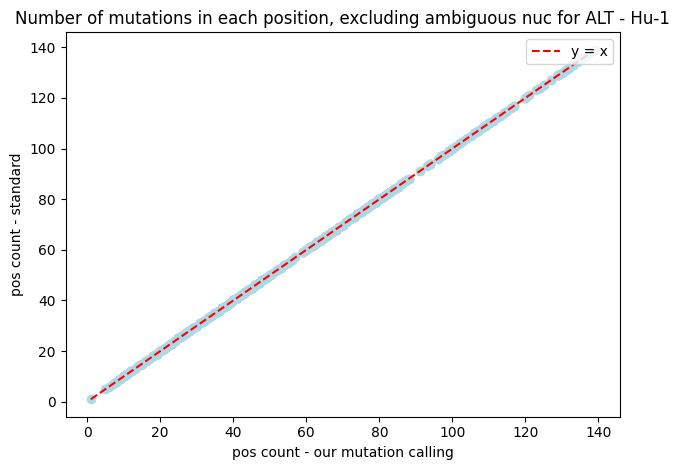

,sra,pos_count_standard,pos_count_manual,gap


In [32]:
hu1_gofasta = process(hu1_gofasta_path)
hu1_manual = process(hu1_manual_path)

pos_mismatch = corr_plt(hu1_gofasta, hu1_manual, "Hu-1")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [38]:
tmp1 = (hu1_gofasta[~hu1_gofasta["alt"].isin(ambiguous_nuc)]
        .drop_duplicates(subset=["sra", "pos", "ref", "alt"])
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
)
tmp2 = (hu1_manual[~hu1_manual["alt"].isin(ambiguous_nuc)]
        .drop_duplicates(subset=["sra", "pos", "ref", "alt"])
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
)

tmp1.equals(tmp2)

True

In [ ]:
ba1_gofasta = process(ba1_gofasta_path)
ba1_manual = process(ba1_manual_path)

pos_mismatch = corr_plt(ba1_gofasta, ba1_manual, "BA1")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [ ]:
tmp1 = ba1_gofasta[(ba1_gofasta["sra"] == "hCoV-19/USA/CA-SEARCH-140651/2024") & (~ba1_gofasta["alt"].isin(ambiguous_nuc))]
tmp2 = ba1_manual[(ba1_manual["sra"] == 'hCoV-19/USA/CA-SEARCH-140651/2024') & (~ba1_manual["alt"].isin(ambiguous_nuc))]
m = pd.merge(tmp1, tmp2, how="outer", on=["pos"], indicator=True)
m[m["_merge"] != "both"]

In [ ]:
tmp1 = ba1_gofasta[(ba1_gofasta["sra"] == "hCoV-19/USA/CA-SEARCH-233687/2024") & (~ba1_gofasta["alt"].isin(ambiguous_nuc))]
tmp2 = ba1_manual[(ba1_manual["sra"] == 'hCoV-19/USA/CA-SEARCH-233687/2024') & (~ba1_manual["alt"].isin(ambiguous_nuc))]
m = pd.merge(tmp1, tmp2, how="outer", on=["pos"], indicator=True)
m[m["_merge"] != "both"]

In [ ]:
ba2_gofasta = process(ba2_gofasta_path)
ba2_manual = process(ba2_manual_path)

pos_mismatch = corr_plt(ba2_gofasta, ba2_manual, "BA2")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [ ]:
tmp2 = ba2_manual[(ba2_manual["sra"] == 'hCoV-19/USA/STM-0007062-B10/2021') & (~ba2_manual["alt"].isin(ambiguous_nuc))]
tmp2

In [ ]:
tmp1 = ba1_manual.loc[ba1_manual["sra"] == "hCoV-19/Iraq/KR-SEARCH-119907/2021", ]
tmp2 = ba1_gofasta.loc[ba1_gofasta["sra"] == "hCoV-19/Iraq/KR-SEARCH-119907/2021", ]
m = pd.merge(tmp1, tmp2, on=["sra", "pos"], how="outer", indicator=True)
m[(m["_merge"]== "left_only")&(~m["alt_x"].isin(ambiguous_nuc))]

In [ ]:
tmp1 = ba1_gofasta.loc[ba1_gofasta["sra"] == "hCoV-19/Iraq/KR-SEARCH-118872/2021", ]
tmp2 = ba1_manual.loc[(ba1_manual["sra"] == "hCoV-19/Iraq/KR-SEARCH-118872/2021") & (ba1_manual["alt"] != 'N'), ]
merged_tmp = pd.merge(tmp1, tmp2, how="outer", on=['sra', 'pos'], indicator=True)
merged_tmp.loc[merged_tmp["_merge"] == 'left_only', :]

In [ ]:
corr_plt(ba2_gofasta, ba2_manual, "BA2")

In [ ]:
df1 = pd.read_csv('/home/eleanor124/projects/bjorn_rep/output/Hu1/mutations.tsv', sep="\t", header=0)
df1.sort_values(by=["sra", "pos"]).reset_index(drop=True, inplace=True)

df2 = pd.read_csv('/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/BA1/mutations.tsv', sep="\t", header=0)
df2.sort_values(by=["sra", "pos"]).reset_index(drop=True, inplace=True)

df2

## PB2 - DMS

In [45]:
pb2_gofasta = process(pb2_gofasta_path)
pb2_gofasta["sra"] = pb2_gofasta["sra"].apply(lambda x: x.split('_')[1])
pb2_mut = process(pb2_mut_path)


pb2_manual = process(pb2_manual_path)
pb2_manual["sra"] = pb2_manual["sra"].apply(lambda x: x.split('_')[1])



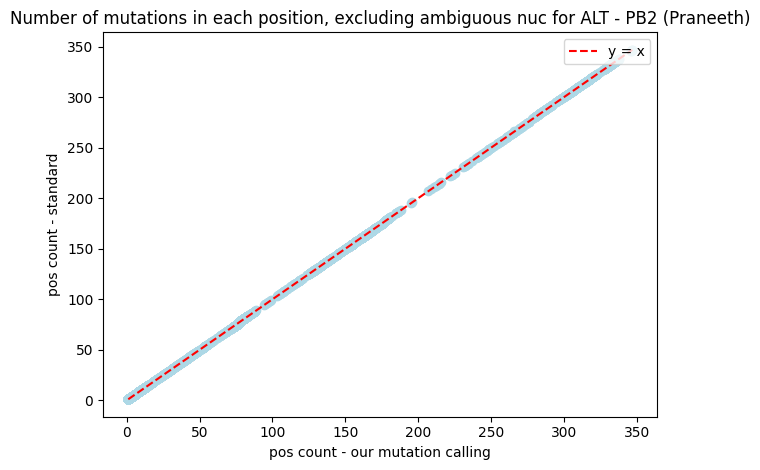

,sra,pos_count_standard,pos_count_manual,gap
324,SRR24839382,332,331,-1
955,SRR24843066,267,266,-1


In [47]:
pos_mismatch = corr_plt(pb2_mut, pb2_manual, "PB2 (Praneeth)")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [50]:
tmp1 = pb2_mut[(pb2_mut["sra"] == "SRR24839382") & (~pb2_mut["alt"].isin(ambiguous_nuc))]
tmp2 = pb2_manual[(pb2_manual["sra"] == "SRR24839382") & (~pb2_manual["alt"].isin(ambiguous_nuc))]
m = pd.merge(tmp1, tmp2, how="outer", indicator=True, on=["sra", "pos"])
m[m["_merge"] == "left_only"]

,sra,region_x,pos,ref_x,alt_x,region_y,ref_y,alt_y,_merge
3,SRR24839382,PB2,29,T,+1,NaN,NaN,NaN,left_only


In [51]:
tmp1 = pb2_mut[(pb2_mut["sra"] == "SRR24843066") & (~pb2_mut["alt"].isin(ambiguous_nuc))]
tmp2 = pb2_manual[(pb2_manual["sra"] == "SRR24843066") & (~pb2_manual["alt"].isin(ambiguous_nuc))]
m = pd.merge(tmp1, tmp2, how="outer", indicator=True, on=["sra", "pos"])
m[m["_merge"] == "left_only"]

,sra,region_x,pos,ref_x,alt_x,region_y,ref_y,alt_y,_merge
259,SRR24843066,PB2,2145,T,+1,NaN,NaN,NaN,left_only


In [55]:
tmp1 = (pb2_mut[~pb2_mut["alt"].isin(ambiguous_nuc)]
        .drop_duplicates(subset=["sra", "pos", "ref", "alt"])
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
)
tmp2 = (pb2_manual[~pb2_manual["alt"].isin(ambiguous_nuc)]
        .drop_duplicates(subset=["sra", "pos", "ref", "alt"])
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
)

m = pd.merge(tmp1, tmp2, how="outer", indicator=True, on=["sra", "pos"])
m[m["_merge"] != "both"]

,sra,region_x,pos,ref_x,alt_x,region_y,ref_y,alt_y,_merge
70751,SRR24839382,PB2,29,T,+1,NaN,NaN,NaN,left_only
203182,SRR24843066,PB2,2145,T,+1,NaN,NaN,NaN,left_only


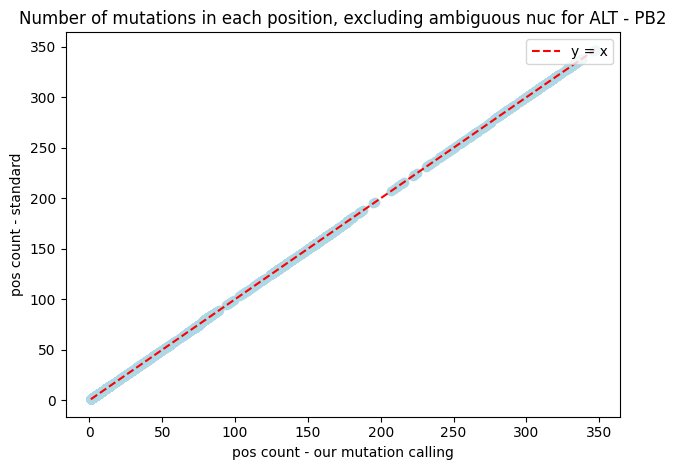

,sra,pos_count_standard,pos_count_manual,gap


In [34]:
pos_mismatch = corr_plt(pb2_gofasta, pb2_manual, "PB2")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)
pos_mismatch

In [39]:
tmp1 = (pb2_gofasta[~pb2_gofasta["alt"].isin(ambiguous_nuc)]
        .drop_duplicates(subset=["sra", "pos", "ref", "alt"])
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
)
tmp2 = (pb2_manual[~pb2_manual["alt"].isin(ambiguous_nuc)]
        .drop_duplicates(subset=["sra", "pos", "ref", "alt"])
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
)

tmp1.equals(tmp2)

True

In [ ]:
tmp1 = pb2_gofasta.loc[(pb2_gofasta["sra"] == "SRR24839164") & (~pb2_gofasta["alt"].isin(ambiguous_nuc)), :]
tmp2 = pb2_manual.loc[(pb2_manual["sra"] == "SRR24839164") & (~pb2_manual["alt"].isin(ambiguous_nuc)), :]
m = pd.merge(tmp1, tmp2, how="outer", indicator=True, on=["sra", "pos"])
m[m["_merge"]=="left_only"]

,sra,region_x,pos,ref_x,alt_x,region_y,ref_y,alt_y,_merge


In [21]:
len(tmp1)

232

In [19]:
m["_merge"].value_counts()

_merge
both          232
left_only       0
right_only      0
Name: count, dtype: int64

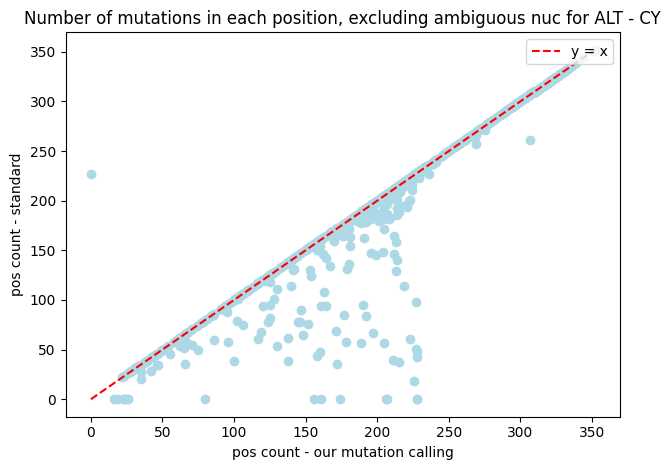

,sra,pos_count_standard,pos_count_manual,gap
69,SRR24839127,264.0,268.0,4.0
151,SRR24839209,119.0,121.0,2.0
216,SRR24839274,266.0,269.0,3.0
272,SRR24839330,158.0,213.0,55.0
295,SRR24839353,257.0,269.0,12.0
...,...,...,...,...
11454,SRR34270245,0.0,16.0,16.0
11455,SRR34542595,0.0,24.0,24.0
11456,SRR35586453,0.0,23.0,23.0
11457,SRR35705809,0.0,26.0,26.0


In [40]:
cy_manual = process(cy_manual_path)
cy_manual["sra"] = cy_manual["sra"].apply(lambda x: x.split('_')[1])
cy_gofasta = process(cy_gofasta_path)
cy_gofasta["sra"] = cy_gofasta["sra"].apply(lambda x: x.split('_')[1])

pos_mismatch = corr_plt(cy_gofasta, cy_manual, "CY")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)
pos_mismatch